<a href="https://colab.research.google.com/github/JuanCappelletti/Consteel_H06/blob/main/ANALISIS%20FLUIDOS%20GASEOSOS%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from operator import truediv
import numpy as np
import pandas as pd
url='https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/main/Trend280922.csv'
datos = pd.read_csv(url,sep=";",decimal=",",index_col=0)
df=pd.DataFrame(datos)
n=160
#df.head()
#df.info()
# segmentan para la curva
for i in range(1,960):
  if i<=160:df1=df.iloc[:160]
  if (i>160 and i<=320):df2=df.iloc[160:320]
  if (i>320 and i<=480):df3=df.iloc[320:480]
  if (i>480 and i<=640):df4=df.iloc[480:640]
  if (i>640 and i<=800):df5=df.iloc[640:800]
  if (i>800 and i<=960):df6=df.iloc[800:960]





In [3]:
import matplotlib.pyplot as plt
def GRAFICAR_Q (T):
  fig, ax = plt.subplots(1, figsize=(60,15))
  fig.suptitle('CAUDAL DE ENTRADA SIDERCA',fontsize=30)
  q=T.FQI161
  x=T.Time
  ax.plot(x,q ,color="Blue",label="FQI_161 entrada")
  p,=ax.plot(x,q,'o',color="red")
  plt.grid(visible=True,which='major',color='#666666',linestyle='-')
  fig.autofmt_xdate()
  plt.show()
def GRAFICAR_P(T):
  fig1, ax0 = plt.subplots(1, figsize=(60,15))
  fig1.suptitle('PRESION DE ENTRADA SIDERCA',fontsize=30)
  p=T.PIR161
  x=T.Time
  ax0.plot(x,p ,color="Blue",label="FQI_161 entrada")
  p,=ax0.plot(x,p,'o',color="red")
  plt.grid(visible=True,which='major',color='#666666',linestyle='-')
  fig1.autofmt_xdate()
  plt.show()

# ***Trends de caudal y presión caudalimetro entrada.***

In [4]:
T=df4

In [ ]:
GRAFICAR_Q(T)

In [ ]:
GRAFICAR_P(T)

# ***Analisis de maximos y minimos***

In [ ]:
print(df.FQI161.describe(),df.PIR161.describe())


In [ ]:
n_muestras=20
dfmax=df.nlargest(n_muestras,'PIR161')
#print(dfmax)
dfmin=df.nsmallest(n_muestras,'PIR161')
#print(dfmin)
dfa=df.loc[df.loc[:, 'PIR161'] <= 12]
print(dfa)

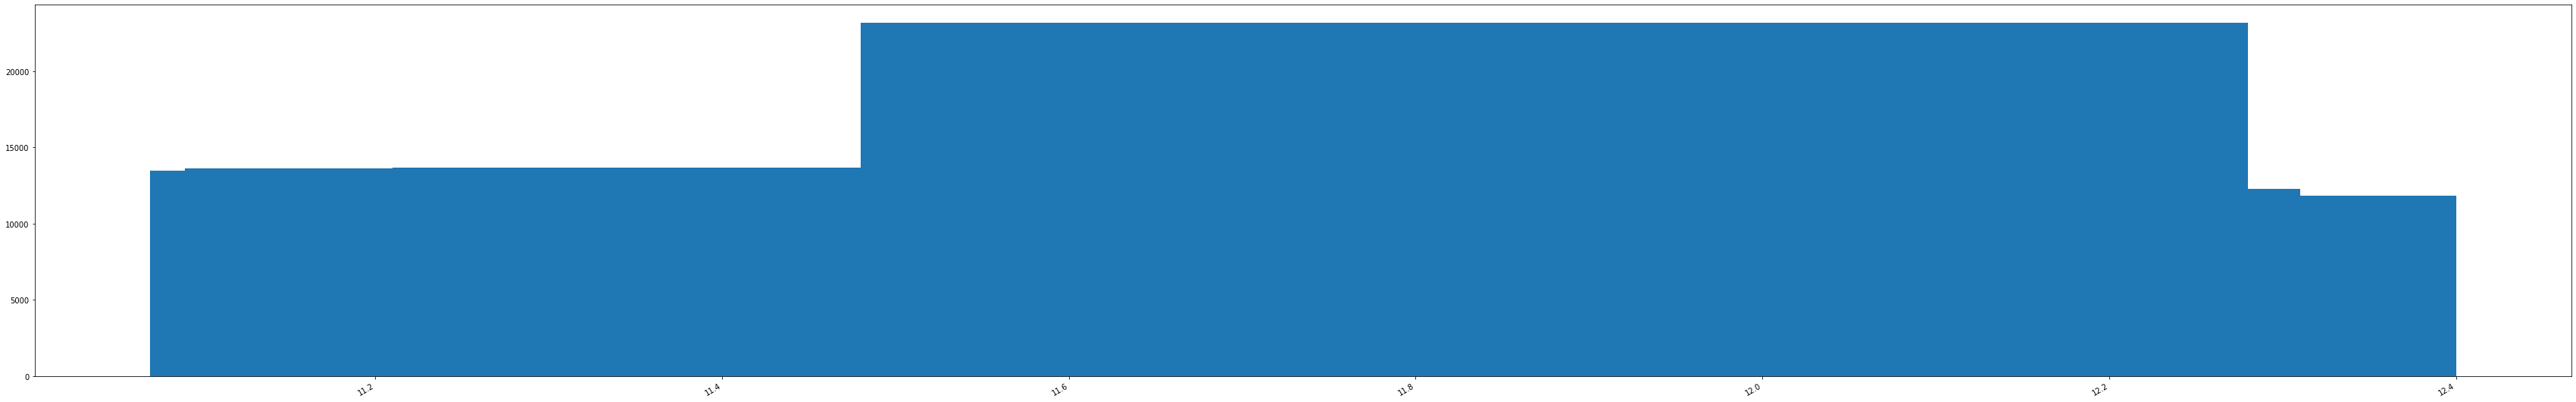

In [48]:
fig2, ax = plt.subplots(1, figsize=(60,10))
#bar_colors=["red","blue"]
ax.bar(dfa.PIR161,dfa.FQI161)#color=bar_colors
fig2.autofmt_xdate()

plt.show()